In [9]:
import matplotlib.pyplot as plt
import seaborn as sn 

from gpt3forchem.data import get_bandgap_data
import seaborn as sns
from glob import glob
import pandas as pd
plt.style.use(['science', 'nature'])

In [12]:
def load_gaps(filename):
    with open(filename) as f:
        lines = f.readlines()

    smiles_file = filename.replace("_gaps", "")

    smiles_ = []
    with open(smiles_file) as f:
        for line in f.readlines():
            smiles_.append(line.strip())
    

    gaps = []
    smiles = []
    path = []
    for i, line in enumerate(lines):
        try:
            smile, gap = line.split()
            num = int(smile.split('/')[-1])
            gaps.append(float(gap))
            smiles.append(smiles_[num])
            path.append(smile)
        except:
            pass
    temperature = float(filename.split("sets")[-1].split("_")[0])
    return pd.DataFrame({"smiles": smiles, "gap": gaps, "temperature": temperature, "path": path})

In [4]:
data = get_bandgap_data()

In [6]:
gaps = data['GFN2_HOMO_LUMO_GAP'] *  27.2114

In [10]:
biased_gap_files = glob("/Users/kevinmaikjablonka/git/kjappelbaum/gpt3forchem/experiments/for_more_xtb_opt/*_smiles_random_biased_sets*_gaps.txt")

In [36]:
first_iteration_gap_files = glob("/Users/kevinmaikjablonka/git/kjappelbaum/gpt3forchem/experiments/for_more_xtb_opt/2022-12-09-23-20-30_smiles_iteration_1_biased_sets*gaps.txt")

In [45]:
second_iteration_gap_files = glob("/Users/kevinmaikjablonka/git/kjappelbaum/gpt3forchem/experiments/for_more_xtb_opt/2022-12-11-23-54-28_smiles_iteration_2_biased*gaps.txt")

In [46]:
biased_gap_res = []
for file in biased_gap_files:
    biased_gap_res.append(load_gaps(file))

biased_gap_res = pd.concat(biased_gap_res)

first_iteration_gap_res = []
for file in first_iteration_gap_files:
    try:
        first_iteration_gap_res.append(load_gaps(file))
    except:
        pass
first_iteration_gap_res = pd.concat(first_iteration_gap_res)


second_iteration_gap_res = []
for file in second_iteration_gap_files:
    try:
        second_iteration_gap_res.append(load_gaps(file))
    except:
        pass
second_iteration_gap_res = pd.concat(second_iteration_gap_res)

/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

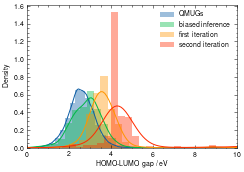

In [47]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))

sns.distplot(gaps, ax=ax, label="QMUGs")
sns.distplot(biased_gap_res['gap'], label="biased inference")
sns.distplot(first_iteration_gap_res['gap'], label="first iteration")
sns.distplot(second_iteration_gap_res['gap'], label="second iteration")
ax.set_xlim(0, 10)
ax.legend()
ax.set_xlabel("HOMO-LUMO gap / eV")
fig.tight_layout()
fig.savefig('biasing_gaps.pdf', bbox_inches='tight')